In [1]:
import numpy as np
import pandas as pd

In [2]:
weather = pd.read_csv("weather.csv")
weather.head()

,year,month,element,day1,day2,day3,day4,day5,day6,day7,...,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31
0,2018,1,max,17.573016,19.796815,22.412495,17.813163,20.165825,17.060539,22.736134,...,22.629226,19.013674,17.831558,17.018316,21.837387,19.700255,19.084056,18.534690,20.787275,21.117423
1,2018,1,min,22.725760,21.007865,17.730792,18.045290,20.766734,18.656651,22.607481,...,21.163491,17.371653,17.194530,18.964190,17.892385,17.646139,19.844125,22.729859,19.768917,20.913443
2,2018,2,max,19.015120,19.261805,17.510713,21.080425,17.915749,19.082145,18.056023,...,21.254968,20.346324,20.036019,22.926773,17.533172,20.308927,20.438899,17.005806,18.346534,20.878165
3,2018,2,min,18.653843,22.818600,21.842673,21.958159,22.523078,18.535469,19.636158,...,19.711974,20.586232,18.780840,20.065633,18.293548,20.823661,18.056112,22.748292,22.470172,18.602007
4,2018,3,max,20.741115,19.704016,17.039811,20.703908,22.714125,17.205000,19.079503,...,19.528963,19.563689,22.658997,22.446357,17.911240,22.591993,17.406800,19.118712,22.767154,17.119452


In [3]:
weather.shape

(22, 34)

In [6]:
pd.melt(weather, ['year', 'month', 'element']).head()

,year,month,element,variable,value
0,2018,1,max,day1,17.573016
1,2018,1,min,day1,22.725760
2,2018,2,max,day1,19.015120
3,2018,2,min,day1,18.653843
4,2018,3,max,day1,20.741115


In [11]:
weather_melt = pd.melt(weather, 
                       id_vars = ['year', 'month', 'element'], 
                       var_name= 'day', 
                       value_name='temp')

weather_melt.head()

,year,month,element,day,temp
0,2018,1,max,day1,17.573016
1,2018,1,min,day1,22.725760
2,2018,2,max,day1,19.015120
3,2018,2,min,day1,18.653843
4,2018,3,max,day1,20.741115


In [12]:
weather_melt.shape

(682, 5)

In [13]:
weather_melt.head()

,year,month,element,day,temp
0,2018,1,max,day1,17.573016
1,2018,1,min,day1,22.725760
2,2018,2,max,day1,19.015120
3,2018,2,min,day1,18.653843
4,2018,3,max,day1,20.741115


In [14]:
weather_tidy = pd.pivot_table(weather_melt, 
                              index=['year' , 'month', 'day'], 
                              columns=['element'], 
                              values='temp', dropna=False)
weather_tidy

element                 max        min
year month day                        
2018 1     day1   17.573016  22.725760
           day10  19.067288  19.931129
           day11  19.361002  22.598325
           day12  20.982134  17.715137
           day13  21.668005  17.940334
...                     ...        ...
     12    day5   21.375349  20.865535
           day6   17.992885  20.310116
           day7   19.683359  20.531823
           day8   20.477046  19.310346
           day9   20.210640  22.820992

[341 rows x 2 columns]

In [16]:
weather_tidy.loc[(2018, 1, 'day11')]

element
max    19.361002
min    22.598325
Name: (2018, 1, day11), dtype: float64

In [15]:
weather_tidy.iloc[2, :]

element
max    19.361002
min    22.598325
Name: (2018, 1, day11), dtype: float64

In [17]:
weather_tidy = weather_tidy.reset_index()
weather_tidy

element,year,month,day,max,min
0,2018,1,day1,17.573016,22.725760
1,2018,1,day10,19.067288,19.931129
2,2018,1,day11,19.361002,22.598325
3,2018,1,day12,20.982134,17.715137
4,2018,1,day13,21.668005,17.940334
...,...,...,...,...,...
336,2018,12,day5,21.375349,20.865535
337,2018,12,day6,17.992885,20.310116
338,2018,12,day7,19.683359,20.531823
339,2018,12,day8,20.477046,19.310346


In [19]:
weather_tidy['day'].apply(lambda x : x[3:])

0       1
1      10
2      11
3      12
4      13
       ..
336     5
337     6
338     7
339     8
340     9
Name: day, Length: 341, dtype: object

In [22]:
weather_tidy['day'] =  weather_tidy['day'].apply(lambda x : x.split('day')[-1], )

In [23]:
weather_tidy

element,year,month,day,max,min
0,2018,1,1,17.573016,22.725760
1,2018,1,10,19.067288,19.931129
2,2018,1,11,19.361002,22.598325
3,2018,1,12,20.982134,17.715137
4,2018,1,13,21.668005,17.940334
...,...,...,...,...,...
336,2018,12,5,21.375349,20.865535
337,2018,12,6,17.992885,20.310116
338,2018,12,7,19.683359,20.531823
339,2018,12,8,20.477046,19.310346


In [26]:
flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')
flights.shape

(144, 3)

In [27]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [31]:
a = pd.pivot_table(flights, index=['year'], columns=['month'], values='passengers', dropna=False).reset_index()
a

month,year,April,August,December,February,January,July,June,March,May,November,October,September
0,1949,129,148,118,118,112,148,135,132,121,104,119,136
1,1950,135,170,140,126,115,170,149,141,125,114,133,158
2,1951,163,199,166,150,145,199,178,178,172,146,162,184
3,1952,181,242,194,180,171,230,218,193,183,172,191,209
4,1953,235,272,201,196,196,264,243,236,229,180,211,237
5,1954,227,293,229,188,204,302,264,235,234,203,229,259
6,1955,269,347,278,233,242,364,315,267,270,237,274,312
7,1956,313,405,306,277,284,413,374,317,318,271,306,355
8,1957,348,467,336,301,315,465,422,356,355,305,347,404
9,1958,348,505,337,318,340,491,435,362,363,310,359,404


In [33]:
a

month,year,April,August,December,February,January,July,June,March,May,November,October,September
0,1949,129,148,118,118,112,148,135,132,121,104,119,136
1,1950,135,170,140,126,115,170,149,141,125,114,133,158
2,1951,163,199,166,150,145,199,178,178,172,146,162,184
3,1952,181,242,194,180,171,230,218,193,183,172,191,209
4,1953,235,272,201,196,196,264,243,236,229,180,211,237
5,1954,227,293,229,188,204,302,264,235,234,203,229,259
6,1955,269,347,278,233,242,364,315,267,270,237,274,312
7,1956,313,405,306,277,284,413,374,317,318,271,306,355
8,1957,348,467,336,301,315,465,422,356,355,305,347,404
9,1958,348,505,337,318,340,491,435,362,363,310,359,404


In [36]:
a = pd.melt(a, id_vars=['year'], var_name='MONTH', value_name='PASSANGER')
a

,year,MONTH,PASSANGER
0,1949,April,129
1,1950,April,135
2,1951,April,163
3,1952,April,181
4,1953,April,235
...,...,...,...
139,1956,September,355
140,1957,September,404
141,1958,September,404
142,1959,September,463


In [39]:
a.sort_values('PASSANGER')

,year,MONTH,PASSANGER
108,1949,November,104
48,1949,January,112
109,1950,November,114
49,1950,January,115
36,1949,February,118
...,...,...,...
83,1960,June,535
70,1959,July,548
22,1959,August,559
23,1960,August,606


In [41]:
weather_tidy.head()

element,year,month,day,max,min
0,2018,1,1,17.573016,22.725760
1,2018,1,10,19.067288,19.931129
2,2018,1,11,19.361002,22.598325
3,2018,1,12,20.982134,17.715137
4,2018,1,13,21.668005,17.940334


In [47]:
pd.cut(weather_tidy['max'], bins =5)

0       (16.996, 18.19]
1       (18.19, 19.377]
2       (18.19, 19.377]
3      (20.565, 21.753]
4      (20.565, 21.753]
             ...       
336    (20.565, 21.753]
337     (16.996, 18.19]
338    (19.377, 20.565]
339    (19.377, 20.565]
340    (19.377, 20.565]
Name: max, Length: 341, dtype: category
Categories (5, interval[float64]): [(16.996, 18.19] < (18.19, 19.377] < (19.377, 20.565] < (20.565, 21.753] < (21.753, 22.94]]

In [50]:
pd.cut(weather_tidy['max'], bins =[10, 13, 15, 19, 24, 30], ).value_counts()

(19, 24]    245
(15, 19]     96
(10, 13]      0
(13, 15]      0
(24, 30]      0
Name: max, dtype: int64

In [52]:
weather_tidy['max_bucket'] = pd.cut(weather_tidy['max'], bins =[10, 13, 15, 19, 24, 30, 1000])

In [53]:
weather_tidy

element,year,month,day,max,min,max_bucket
0,2018,1,1,17.573016,22.725760,"(15, 19]"
1,2018,1,10,19.067288,19.931129,"(19, 24]"
2,2018,1,11,19.361002,22.598325,"(19, 24]"
3,2018,1,12,20.982134,17.715137,"(19, 24]"
4,2018,1,13,21.668005,17.940334,"(19, 24]"
...,...,...,...,...,...,...
336,2018,12,5,21.375349,20.865535,"(19, 24]"
337,2018,12,6,17.992885,20.310116,"(15, 19]"
338,2018,12,7,19.683359,20.531823,"(19, 24]"
339,2018,12,8,20.477046,19.310346,"(19, 24]"


## write a .csv

In [60]:
weather_tidy.to_csv('result.csv', index=False)

In [58]:
pd.read_csv('result.csv')

,year,month,day,max,min,max_bucket
0,2018,1,1,17.573016,22.725760,"(15, 19]"
1,2018,1,10,19.067288,19.931129,"(19, 24]"
2,2018,1,11,19.361002,22.598325,"(19, 24]"
3,2018,1,12,20.982134,17.715137,"(19, 24]"
4,2018,1,13,21.668005,17.940334,"(19, 24]"
...,...,...,...,...,...,...
336,2018,12,5,21.375349,20.865535,"(19, 24]"
337,2018,12,6,17.992885,20.310116,"(15, 19]"
338,2018,12,7,19.683359,20.531823,"(19, 24]"
339,2018,12,8,20.477046,19.310346,"(19, 24]"


# Uber Trip Analysis

In [61]:
data = pd.read_csv("UberData.csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [62]:
data.shape

(1156, 7)

In [63]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [65]:
data.drop(1155, inplace = True)

In [66]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [69]:
data.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [70]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [71]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# data.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES','PURPOSE'] 

In [75]:
data.columns = [x.replace("*", '') for x in data.columns]

In [76]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [79]:
# data.columns = list(map(lambda x : x[:-1], data.columns))

In [85]:
data['STOP'].str.len()

0       11
1       11
2       11
3       11
4       15
        ..
1150     7
1151    16
1152    16
1153     7
1154     9
Name: STOP, Length: 1155, dtype: int64

In [87]:
data['STOP'].str.upper()

0            FORT PIERCE
1            FORT PIERCE
2            FORT PIERCE
3            FORT PIERCE
4        WEST PALM BEACH
              ...       
1150             KAR?CHI
1151    UNKNOWN LOCATION
1152    UNKNOWN LOCATION
1153             GAMPAHA
1154           ILUKWATTA
Name: STOP, Length: 1155, dtype: object

In [88]:
data['STOP'].str.split()

0            [Fort, Pierce]
1            [Fort, Pierce]
2            [Fort, Pierce]
3            [Fort, Pierce]
4       [West, Palm, Beach]
               ...         
1150              [Kar?chi]
1151    [Unknown, Location]
1152    [Unknown, Location]
1153              [Gampaha]
1154            [Ilukwatta]
Name: STOP, Length: 1155, dtype: object

In [81]:
data['STOP'].apply(lambda x: len(x))

0       11
1       11
2       11
3       11
4       15
        ..
1150     7
1151    16
1152    16
1153     7
1154     9
Name: STOP, Length: 1155, dtype: int64

In [89]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [92]:
data['START_DATE'][0]

'1/1/2016 21:11'

In [94]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 104.5+ KB


In [96]:
# datetime.strptime(date_of_execution,"%Y-%m-%d")

In [97]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [100]:
ts = data['START_DATE'][1]
ts

Timestamp('2016-01-01 21:11:00')

In [101]:
ts.year

2016

In [102]:
ts.month

1

In [104]:
ts.day

1

In [105]:
ts.month_name()

'January'

In [107]:
ts.day_name()

'Friday'

In [110]:
ts.weekday()

4

In [111]:
ts.hour

21

In [112]:
ts.minute

11

In [119]:
data['START_DATE'].apply(lambda x : x.year)

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1150    2016
1151    2016
1152    2016
1153    2016
1154    2016
Name: START_DATE, Length: 1155, dtype: int64

In [123]:
data['year'] = data['START_DATE'].dt.year

In [124]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016


In [125]:
data.describe()

,MILES,year
count,1155.000000,1155.0
mean,10.566840,2016.0
std,21.579106,0.0
min,0.500000,2016.0
25%,2.900000,2016.0
50%,6.000000,2016.0
75%,10.400000,2016.0
max,310.300000,2016.0


In [126]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016


In [127]:
data['MILES'].mean()

10.566839826839812

In [128]:
data['MONTH'] = data['START_DATE'].dt.month_name()

In [129]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January


In [130]:
data['MONTH'].value_counts()

December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
Name: MONTH, dtype: int64

In [141]:
gb = data.groupby(by='MONTH')
gb.sum().sort_values('MILES', ascending=False)['MILES']

MONTH
October      1810.0
March        1693.9
August       1335.5
July         1224.6
April        1113.0
December      981.3
February      908.2
June          842.8
November      816.9
September     601.8
January       512.9
May           363.8
Name: MILES, dtype: float64

In [135]:
# gb.get_group('January')

In [145]:
data[data['MILES']>200]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,2016,March
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201.0,Meeting,2016,March


In [149]:
data[data['MILES']< 1].head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016,January
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,2016,January
120,2016-02-17 16:38:00,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies,2016,February
189,2016-03-04 16:16:00,2016-03-04 16:22:00,Business,Fayetteville Street,Depot Historic District,0.8,Errand/Supplies,2016,March
212,2016-03-11 10:29:00,2016-03-11 10:36:00,Business,Congress Ave District,Downtown,0.8,NaN,2016,March


In [150]:
data['KMs']= data['MILES']*1.609

In [151]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH,KMs
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,8.2059
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,January,8.0450
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,7.7232
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,7.5623
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,102.4933


In [152]:
data['HOUR'] = data['START_DATE'].dt.hour

In [154]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH,KMs,HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,8.2059,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,January,8.0450,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,7.7232,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,7.5623,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,102.4933,14


In [155]:
data['HOUR'].value_counts()

15    98
17    95
18    94
13    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
21    51
9     51
8     35
22    31
23    26
0     19
7     13
1      5
6      4
5      4
3      3
2      2
Name: HOUR, dtype: int64

In [156]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH,KMs,HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,8.2059,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,January,8.0450,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,7.7232,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,7.5623,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,102.4933,14


In [173]:
def convertToMinutes(time):
    return time.seconds/60

In [175]:
data['DURATION_MINS'] = (data['END_DATE'] - data['START_DATE']).apply(convertToMinutes)

In [176]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH,KMs,HOUR,DURATION_MINS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,8.2059,21,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,January,8.0450,1,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,7.7232,20,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,7.5623,17,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,102.4933,14,67.0


In [181]:
data['SPEED_KMPH']= (data['KMs']/(data['DURATION_MINS']/60)).round(1)

In [182]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH,KMs,HOUR,DURATION_MINS,SPEED_KMPH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,8.2059,21,6.0,82.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,January,8.0450,1,12.0,40.2
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,7.7232,20,13.0,35.6
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,7.5623,17,14.0,32.4
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,102.4933,14,67.0,91.8


In [183]:
data['SPEED_KMPH'].mean()

inf

In [184]:
data[data['SPEED_KMPH'] > 10000]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,year,MONTH,KMs,HOUR,DURATION_MINS,SPEED_KMPH
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,NaN,2016,September,111.1819,17,0.0,inf
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,NaN,2016,September,2.5744,7,0.0,inf
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,NaN,2016,October,5.7924,15,0.0,inf
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,NaN,2016,October,1.1263,13,0.0,inf


In [188]:
data['PURPOSE'].value_counts(dropna=False)

NaN                502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [189]:
data['PURPOSE'].fillna('OTHER', inplace=True)

In [190]:
data.isna().sum()

START_DATE       0
END_DATE         0
CATEGORY         0
START            0
STOP             0
MILES            0
PURPOSE          0
year             0
MONTH            0
KMs              0
HOUR             0
DURATION_MINS    0
SPEED_KMPH       0
dtype: int64

<AxesSubplot:>

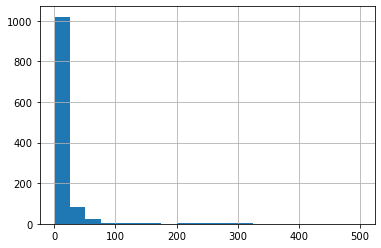

In [196]:
data['KMs'].hist(bins=20)